<a href="https://colab.research.google.com/github/junkuna/Machine-Learning-Training/blob/main/Feature_Engineering_and_Regulation_(Predict_Weight)_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

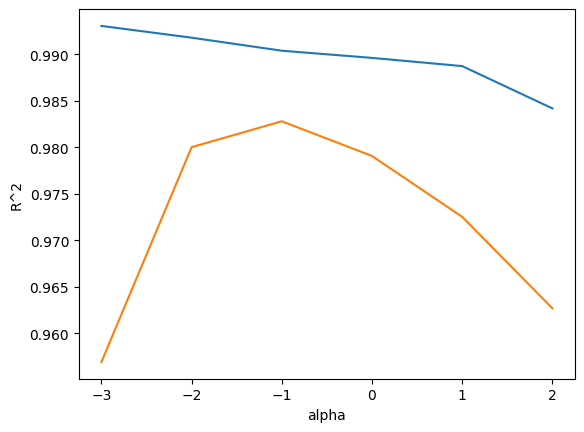

It shows overfitting from the left and it changes to underfitting going to the right.
Alpha = 0.1 is the balance between train and test sets
The regulated train score with alpha is  0.9903815817570367
The regulated test score with alpha is  0.9827976465386928
0.989789897208096
0.9800593698421883
It looks good, but we can control regulation more by alpha parameter


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


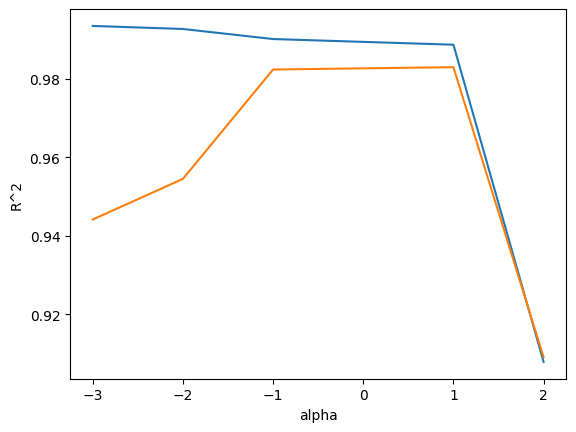

The graph shows overfitting from the left and underfitting to the right. The alpha = 10 is optimized value.
We will train the model using alpha = 10
The regulated train score with alpha is  0.9888067471131867
The regulated test score with alpha is  0.9824470598706695


In [ ]:
## Due to previous underfitting model, we will use more feature of perch
## Using pandas to bring file data and change to numpy array
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


## train and test sets
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

from sklearn.preprocessing import PolynomialFeatures

## producing a feature or processing, we use transformer
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)

### before transform, necessary to train first
train_poly = poly.transform(train_input)
print('checking how the features are made')
print(train_poly.shape)

print('checking how features are made by transformer')
print(poly.get_feature_names_out())

## working on the test set, first transform
test_poly = poly.transform(test_input)

## we can identify multiple regression (length, width, height) by linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print('train score is ', lr.score(train_poly, train_target))
print('test score is ', lr.score(test_poly, test_target))

## we will try producing more features using degree 5
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print('Give it a shot for producing more features using degree = 5.')
print(train_poly.shape)
print('Now we have 55 features, we will train and test again.')

## train and test again
lr.fit(train_poly, train_target)
print('The train score is ', lr.score(train_poly, train_target))
print('The test score is ', lr.score(test_poly, test_target))
print('It shows overfitting due to over features than samples. We will use regularization')

## we want to normalize coefficients to regulate train set. Regulation supports
## train sets to not over train samples.
## for the linear regression, regulation will reduce the coeffcients(slopes) to
## reduce train score and increase test score.

### producing mean and standard regression to normalize coefficents for fair regulation of feature scale
### StandardScaler is one of transformer
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## we will use ridge to regulate coefficents
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print('Regulated train is ', ridge.score(train_scaled, train_target))
print('Regulated test is ', ridge.score(test_scaled, test_target))
print('It does not overfitting and underfitting.')


## we will find alpha value related to regulation to prevent over/underfitting, by R^2 graph
## we can control regulation strongness by finding alpha.

### let's make package for keep scores for each alpha value
import matplotlib.pyplot as plt
train_score = []
test_score = []

### alpha list with increasing 10 times value by training ridge linear regression.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### producing ridge model
for alpha in alpha_list:

  ridge = Ridge(alpha=alpha)
  ### train alpha
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
print('It shows overfitting from the left and it changes to underfitting going to the right.')
print('Alpha = 0.1 is the balance between train and test sets')

ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print('The regulated train score with alpha is ', ridge.score(train_scaled, train_target))
print('The regulated test score with alpha is ', ridge.score(test_scaled, test_target))

### Leverage Lasso model to control regulation
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
print('It looks good, but we can control regulation more by alpha parameter')

#### Using alpha parameter
train_score=[]
test_score = []
alpha_list = [0.001, 0.01, 0.1, 10, 100]
for alpha in alpha_list :
  lasso = Lasso(alpha = alpha, max_iter = 100000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
print('The graph shows overfitting from the left and underfitting to the right. The alpha = 10 is optimized value.')
print('We will train the model using alpha = 10')

### train the model using alpha = 10
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print('The regulated train score with alpha is ',lasso.score(train_scaled, train_target))
print('The regulated test score with alpha is ',lasso.score(test_scaled, test_target))
print('Now the model can predict positive weight through samples')


